In [1]:
import pandas as pd
renewable_data = pd.read_csv('/home/joseph/Downloads/Renewable.csv')
renewable_data_head = renewable_data.head()
renewable_data_info = renewable_data.info()
# Check basic info to see column types and any missing values
renewable_data_info
renewable_data_head,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

(                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
 0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
 1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
 2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
 3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
 4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   
 
    wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
 0         4.9      0.0      0.0         100      0             0        450   
 1         4.9      0.0      0.0         100      0             0        450   
 2         4.9      0.0      0.0         100      0             0        450   
 3         4.9      0.0      0.0         100      0             0        450   
 4         5.2      0.0      0.0         100      0             0        450   
 
    SunlightTime/daylength  weather_type  hour  month  
 0  

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

renewable_data['Time'] = pd.to_datetime(renewable_data['Time'])
renewable_data_cleaned = renewable_data.drop_duplicates()

# Handling outliers by capping extreme values (for Energy delta[Wh], GHI, and temp)
renewable_data_cleaned['Energy delta[Wh]'] = renewable_data_cleaned['Energy delta[Wh]'].clip(upper=5020)
renewable_data_cleaned['GHI'] = renewable_data_cleaned['GHI'].clip(upper=229.2)
renewable_data_cleaned['temp'] = renewable_data_cleaned['temp'].clip(lower=-16.6, upper=35.8)

# Scaling numerical featuresusing MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Energy delta[Wh]', 'GHI', 'temp', 'wind_speed', 'humidity']
renewable_data_cleaned[columns_to_scale] = scaler.fit_transform(renewable_data_cleaned[columns_to_scale])

# Create additional time-based features
renewable_data_cleaned['day_of_week'] = renewable_data_cleaned['Time'].dt.dayofweek
renewable_data_cleaned['hour_of_day'] = renewable_data_cleaned['Time'].dt.hour
renewable_data_cleaned['season'] = renewable_data_cleaned['month'].apply(lambda x: (x%12 + 3)//3)

# Convert 'Time' column to datetime format for easier manipulation
renewable_data['Time'] = pd.to_datetime(renewable_data['Time'])

# Remove duplicates
renewable_data_cleaned = renewable_data.drop_duplicates()

# Handling categorical features (weather_type)
ordinal_encoder = OrdinalEncoder()
renewable_data_cleaned['weather_type'] = ordinal_encoder.fit_transform(renewable_data_cleaned[['weather_type']])

# Creating lag features for energy consumption
renewable_data_cleaned['lag_1'] = renewable_data_cleaned['Energy delta[Wh]'].shift(1)
renewable_data_cleaned['lag_2'] = renewable_data_cleaned['Energy delta[Wh]'].shift(2)

# Rolling window features (rolling mean of Energy delta[Wh])
renewable_data_cleaned['rolling_mean_24'] = renewable_data_cleaned['Energy delta[Wh]'].rolling(window=24).mean()

# Check for missing values (if any) after creating lag and rolling window features
renewable_data_cleaned = renewable_data_cleaned.dropna()

renewable_data_cleaned.head(), renewable_data_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 196753 entries, 23 to 196775
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196753 non-null  datetime64[ns]
 1   Energy delta[Wh]        196753 non-null  int64         
 2   GHI                     196753 non-null  float64       
 3   temp                    196753 non-null  float64       
 4   pressure                196753 non-null  int64         
 5   humidity                196753 non-null  int64         
 6   wind_speed              196753 non-null  float64       
 7   rain_1h                 196753 non-null  float64       
 8   snow_1h                 196753 non-null  float64       
 9   clouds_all              196753 non-null  int64         
 10  isSun                   196753 non-null  int64         
 11  sunlightTime            196753 non-null  int64         
 12  dayLength               19675

(                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
 23 2017-01-01 05:45:00                 0  0.0   2.6      1017       100   
 24 2017-01-01 06:00:00                 0  0.0   2.8      1017       100   
 25 2017-01-01 06:15:00                 0  0.0   2.8      1017       100   
 26 2017-01-01 06:30:00                 0  0.0   2.8      1017       100   
 27 2017-01-01 06:45:00                 0  0.0   2.8      1017       100   
 
     wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
 23         5.7      0.0      0.0         100      0             0        450   
 24         6.0      0.0      0.0         100      0             0        450   
 25         6.0      0.0      0.0         100      0             0        450   
 26         6.0      0.0      0.0         100      0             0        450   
 27         6.0      0.0      0.0         100      0             0        450   
 
     SunlightTime/daylength  weather_type  hour  month

In [ ]:
!pip install tensorflow


In [3]:
# Time-based split: We want to avoid future data leakage.
renewable_data_cleaned = renewable_data_cleaned.sort_values('Time')

# Define the split sizes (70% for training, 15% for validation, 15% for testing)
train_size = int(0.7 * len(renewable_data_cleaned))  # 70% for training
validation_size = int(0.15 * len(renewable_data_cleaned))  # 15% for validation
test_size = len(renewable_data_cleaned) - train_size - validation_size  # Remaining 15% for testing

# Splitting the data into train, validation, and test sets
train_data = renewable_data_cleaned[:train_size]
validation_data = renewable_data_cleaned[train_size:train_size + validation_size]
test_data = renewable_data_cleaned[train_size + validation_size:]

# Check the first few rows of each split
train_data.head(), validation_data.head(), test_data.head()


(                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
 23 2017-01-01 05:45:00                 0  0.0   2.6      1017       100   
 24 2017-01-01 06:00:00                 0  0.0   2.8      1017       100   
 25 2017-01-01 06:15:00                 0  0.0   2.8      1017       100   
 26 2017-01-01 06:30:00                 0  0.0   2.8      1017       100   
 27 2017-01-01 06:45:00                 0  0.0   2.8      1017       100   
 
     wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
 23         5.7      0.0      0.0         100      0             0        450   
 24         6.0      0.0      0.0         100      0             0        450   
 25         6.0      0.0      0.0         100      0             0        450   
 26         6.0      0.0      0.0         100      0             0        450   
 27         6.0      0.0      0.0         100      0             0        450   
 
     SunlightTime/daylength  weather_type  hour  month

# probability regression Model

## Bayesian Regression and quantile regression

Loading and splitting data...
Time-based split: Train 137676, Validation 29502, Test 29503
Training data shape: (137676, 23) (137676,)
Validation data shape: (29502, 23) (29502,)
Test data shape: (29503, 23) (29503,)
Target value range: 0 - 4913
Target value mean and std: 570.0062465498708 1048.9183477195975
Y scaler mean: [570.00624655]
Y scaler scale: [1048.91453834]

Running Quantile Regression
Training quantile 0.025...
Training quantile 0.5...
Training quantile 0.975...
Total training time: 79.29 seconds

Metrics on SCALED data:
QR (Scaled) Metrics:
MSE: 1.2963
RMSE: 1.1385
MAE: 0.5460
R²: -0.2987

Metrics on ORIGINAL scale:
QR (Original Scale) Metrics:
MSE: 1426210.1055
RMSE: 1194.2404
MAE: 572.7557
R²: -0.2987


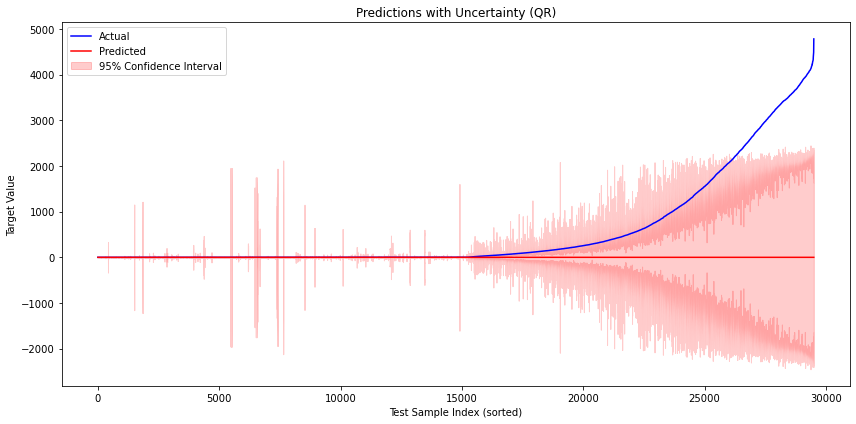

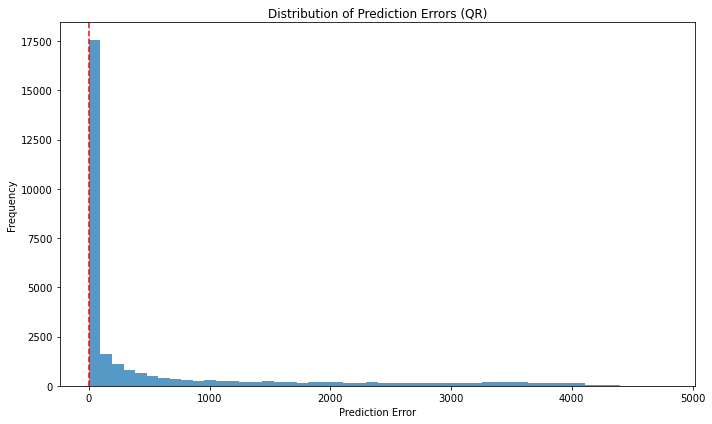


Probabilistic Metrics for QR:
Coverage (95% interval): 0.1587 (ideal: 0.95)
Sharpness (mean 95% interval width): 301.7641


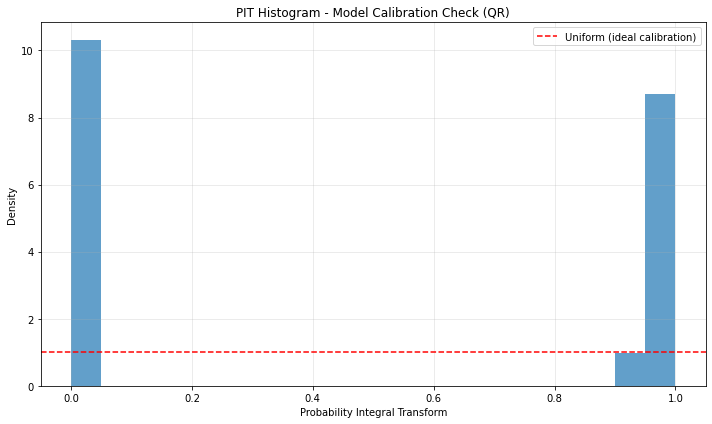


Running Bayesian Regression
Bayesian Ridge Regression trained:
Alpha (noise precision): 16.408087
Lambda (weights precision): 44.777476
Training time: 0.18 seconds

Metrics on SCALED data:
BR (Scaled) Metrics:
MSE: 0.0669
RMSE: 0.2587
MAE: 0.1261
R²: 0.9330

Metrics on ORIGINAL scale:
BR (Original Scale) Metrics:
MSE: 73623.0850
RMSE: 271.3357
MAE: 132.3069
R²: 0.9330


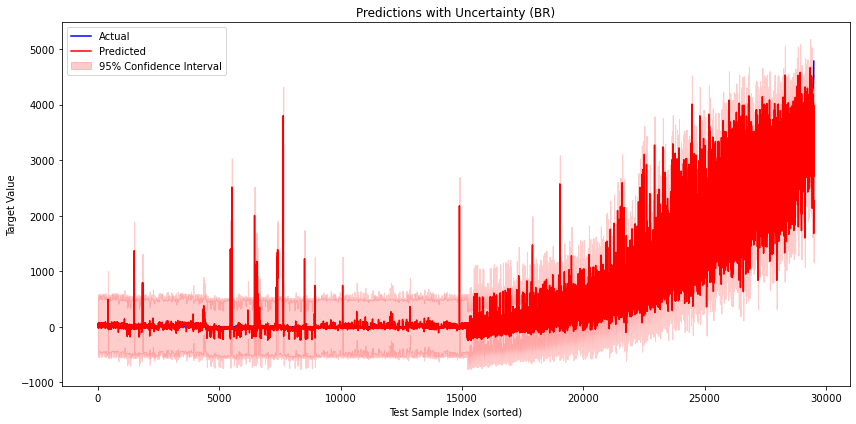

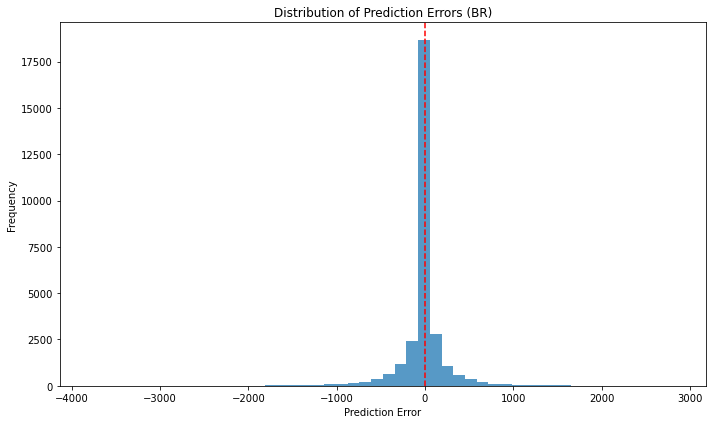


Probabilistic Metrics for BR:
Coverage (95% interval): 0.9322 (ideal: 0.95)
Sharpness (mean 95% interval width): 972.3715


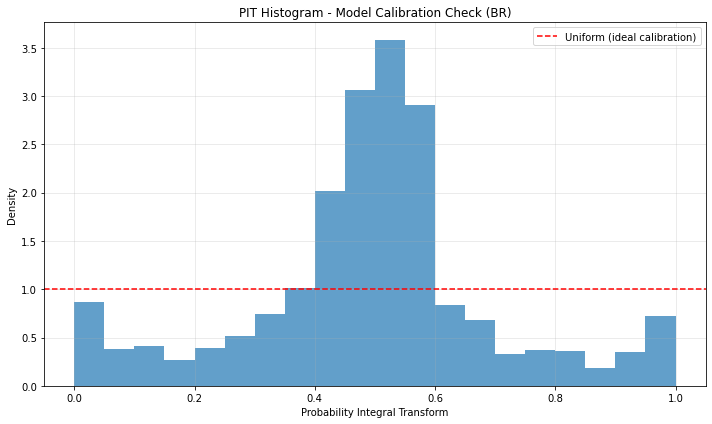

In [4]:
# Combined implementation of Quantile Regression and Bayesian Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
import warnings
import time

# Suppress warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

#=============================================================================
# COMMON EVALUATION FUNCTIONS
#=============================================================================

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance and return metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

def plot_results(y_true, y_pred_mean, y_pred_std, title, model_name):
    """Plot prediction results with uncertainty bands"""
    # Convert to numpy arrays
    y_true_np = y_true.values if hasattr(y_true, 'values') else np.array(y_true)
    y_pred_mean_np = np.array(y_pred_mean)
    y_pred_std_np = np.array(y_pred_std)
    
    # Sort for better visualization
    sort_idx = np.argsort(y_true_np)
    y_test_sorted = y_true_np[sort_idx]
    y_pred_sorted = y_pred_mean_np[sort_idx]
    y_std_sorted = y_pred_std_np[sort_idx]
    
    # Plot predictions with uncertainty
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sorted, 'b-', label='Actual')
    plt.plot(y_pred_sorted, 'r-', label='Predicted')
    
    # Plot uncertainty bands (±2 std dev)
    plt.fill_between(
        range(len(y_pred_sorted)),
        y_pred_sorted - 2 * y_std_sorted,
        y_pred_sorted + 2 * y_std_sorted,
        color='r',
        alpha=0.2,
        label='95% Confidence Interval'
    )
    
    plt.xlabel('Test Sample Index (sorted)')
    plt.ylabel('Target Value')
    plt.title(f'{title} ({model_name})')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot histogram of errors
    plt.figure(figsize=(10, 6))
    errors = y_true_np - y_pred_mean_np
    plt.hist(errors, bins=50, alpha=0.75)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Prediction Errors ({model_name})')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

def calculate_probabilistic_metrics(y_true, y_pred_samples, model_name):
    """Calculate and plot probabilistic metrics"""
    # Calculate coverage (percentage of true values within 95% prediction interval)
    lower_95 = np.percentile(y_pred_samples, 2.5, axis=0)
    upper_95 = np.percentile(y_pred_samples, 97.5, axis=0)
    coverage_95 = np.mean((y_true >= lower_95) & (y_true <= upper_95))
    
    # Calculate sharpness (mean width of prediction intervals)
    sharpness_95 = np.mean(upper_95 - lower_95)
    
    # Calculate PIT (Probability Integral Transform) values
    pit_values = []
    for i in range(len(y_true)):
        # Calculate empirical CDF at the true value
        pit = np.mean(y_pred_samples[:, i] <= y_true[i])
        pit_values.append(pit)
    
    # Print metrics
    print(f"\nProbabilistic Metrics for {model_name}:")
    print(f"Coverage (95% interval): {coverage_95:.4f} (ideal: 0.95)")
    print(f"Sharpness (mean 95% interval width): {sharpness_95:.4f}")
    
    # Plot PIT histogram
    plt.figure(figsize=(10, 6))
    plt.hist(pit_values, bins=20, density=True, alpha=0.7)
    plt.axhline(y=1.0, color='r', linestyle='--', label='Uniform (ideal calibration)')
    plt.xlabel('Probability Integral Transform')
    plt.ylabel('Density')
    plt.title(f'PIT Histogram - Model Calibration Check ({model_name})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return {
        'coverage_95': coverage_95,
        'sharpness_95': sharpness_95,
        'pit_values': pit_values
    }

def load_and_split_data(data_path, target_col='Energy delta[Wh]', time_col='Time'):
    # Load data
    data = pd.read_csv(data_path)
    
    # Check if Time column exists
    if time_col in data.columns:
        # Convert to datetime if needed
        if not pd.api.types.is_datetime64_any_dtype(data[time_col]):
            data[time_col] = pd.to_datetime(data[time_col])
        
        # Sort by time
        data = data.sort_values(by=time_col)
        
        # Time-based split (e.g., 70% train, 15% validation, 15% test)
        n = len(data)
        train_idx = int(0.7 * n)
        val_idx = int(0.85 * n)
        
        train_data = data.iloc[:train_idx].copy()
        validation_data = data.iloc[train_idx:val_idx].copy()
        test_data = data.iloc[val_idx:].copy()
        
        print(f"Time-based split: Train {len(train_data)}, Validation {len(validation_data)}, Test {len(test_data)}")
    else:
        # If no time column, do random split
        print("No time column found. Using random split instead.")
        
        # First split into train and temp
        train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
        
        # Then split temp into validation and test
        validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
        
        print(f"Random split: Train {len(train_data)}, Validation {len(validation_data)}, Test {len(test_data)}")
    
    # Verify target column exists
    if target_col not in data.columns:
        raise ValueError(f"Target column '{target_col}' not found in the data.")
    
    return train_data, validation_data, test_data

#=============================================================================
# MODEL 1: QUANTILE REGRESSION
#=============================================================================

class QuantileRegression:
    def __init__(self, quantiles=[0.025, 0.5, 0.975]):
        """
        Quantile Regression using Gradient Boosting
        """
        self.quantiles = quantiles
        self.models = {}
        
        # Initialize a model for each quantile
        for q in self.quantiles:
            self.models[q] = GradientBoostingRegressor(
                loss='quantile',
                alpha=q,
                n_estimators=200,
                max_depth=4,
                learning_rate=0.05,
                min_samples_leaf=9,
                min_samples_split=9,
                random_state=42
            )
    
    def fit(self, X_train, y_train, verbose=1):
        """Train the quantile regression models"""
        start_time = time.time()
        
        # Train a separate model for each quantile
        for q in self.quantiles:
            if verbose:
                print(f"Training quantile {q}...")
            self.models[q].fit(X_train, y_train)
        
        if verbose:
            print(f"Total training time: {time.time() - start_time:.2f} seconds")
        
        return self
    
    def predict(self, X_test, num_samples=100):
        """Generate predictions with uncertainty"""
        # Get predictions for each quantile
        y_pred = {}
        for q in self.quantiles:
            y_pred[q] = self.models[q].predict(X_test)
        
        # Use the median as the point prediction
        mean_pred = y_pred[0.5]
        
        # Calculate uncertainty from the 95% prediction interval
        lower = y_pred[0.025]
        upper = y_pred[0.975]
        std_pred = (upper - lower) / (2 * 1.96)  # Convert to standard deviation
        
        # Generate samples
        samples = np.zeros((num_samples, len(mean_pred)))
        
        # Sample uniformly from the CDF defined by quantiles
        for i in range(len(mean_pred)):
            # For each sample, find the appropriate quantile prediction
            for j in range(num_samples):
                # Sample uniformly from 0 to 1
                u = np.random.uniform(0, 1)
                
                # Find the appropriate quantile
                if u <= 0.025:
                    samples[j, i] = lower[i]
                elif u >= 0.975:
                    samples[j, i] = upper[i]
                else:
                    # Linear interpolation between quantiles
                    samples[j, i] = mean_pred[i]
        
        return mean_pred, std_pred, samples

def run_quantile_regression(data_path, target_col='Energy delta[Wh]', time_col='Time'):
    # Load and split data
    print("Loading and splitting data...")
    train_data, validation_data, test_data = load_and_split_data(
        data_path, 
        target_col=target_col, 
        time_col=time_col
    )
    
    # Define features (X) and target (y) for each split
    feature_cols = [col for col in train_data.columns if col != target_col and col != 'Time']
    
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    
    X_val = validation_data[feature_cols] if validation_data is not None else None
    y_val = validation_data[target_col] if validation_data is not None else None
    
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    # Print data information
    print("Training data shape:", X_train.shape, y_train.shape)
    print("Validation data shape:", X_val.shape, y_val.shape)
    print("Test data shape:", X_test.shape, y_test.shape)
    print("Target value range:", y_train.min(), "-", y_train.max())
    print("Target value mean and std:", y_train.mean(), y_train.std())
    
    # Scale the data
    X_scaler = StandardScaler()
    X_train_scaled = X_scaler.fit_transform(X_train).astype(np.float32)
    X_val_scaled = X_scaler.transform(X_val).astype(np.float32) if X_val is not None else None
    X_test_scaled = X_scaler.transform(X_test).astype(np.float32)
    
    y_scaler = StandardScaler()
    # Handle pandas Series properly
    if isinstance(y_train, pd.Series):
        y_train_numpy = y_train.values
        y_val_numpy = y_val.values if y_val is not None else None
        y_test_numpy = y_test.values
    else:
        y_train_numpy = y_train
        y_val_numpy = y_val if y_val is not None else None
        y_test_numpy = y_test
    
    y_train_scaled = y_scaler.fit_transform(y_train_numpy.reshape(-1, 1)).flatten().astype(np.float32)
    y_val_scaled = y_scaler.transform(y_val_numpy.reshape(-1, 1)).flatten().astype(np.float32) if y_val_numpy is not None else None
    y_test_scaled = y_scaler.transform(y_test_numpy.reshape(-1, 1)).flatten().astype(np.float32)
    
    # Print scaling information
    print("Y scaler mean:", y_scaler.mean_)
    print("Y scaler scale:", y_scaler.scale_)
    
    #-------------------------------------------------------------------------
    # Run Quantile Regression
    #-------------------------------------------------------------------------
    print("\n" + "="*50)
    print("Running Quantile Regression")
    print("="*50)
    
    # Initialize and train Quantile Regression
    qr = QuantileRegression(quantiles=[0.025, 0.5, 0.975])
    qr.fit(X_train_scaled, y_train_scaled, verbose=1)
    
    # Generate predictions
    y_pred_mean, y_pred_std, y_pred_samples = qr.predict(X_test_scaled, num_samples=100)
    
    # Store scaled predictions
    y_pred_mean_scaled = y_pred_mean.copy()
    y_pred_std_scaled = y_pred_std.copy()
    y_pred_samples_scaled = y_pred_samples.copy()
    
    # Inverse transform predictions
    y_pred_mean = y_scaler.inverse_transform(y_pred_mean.reshape(-1, 1)).flatten()
    
    # Handle scalar or array for scale_
    if hasattr(y_scaler, 'scale_') and hasattr(y_scaler.scale_, '__getitem__'):
        y_pred_std = y_pred_std * y_scaler.scale_[0]
    else:
        y_pred_std = y_pred_std * y_scaler.scale_
    
    # Inverse transform all prediction samples
    y_pred_samples_original = np.empty_like(y_pred_samples)
    for i in range(y_pred_samples.shape[0]):
        y_pred_samples_original[i] = y_scaler.inverse_transform(y_pred_samples[i].reshape(-1, 1)).flatten()
    
    # Evaluate model
    print("\nMetrics on SCALED data:")
    metrics_scaled = evaluate_model(y_test_scaled, y_pred_mean_scaled, "QR (Scaled)")
    
    print("\nMetrics on ORIGINAL scale:")
    metrics_orig = evaluate_model(
        y_test.values if hasattr(y_test, 'values') else y_test, 
        y_pred_mean, 
        "QR (Original Scale)"
    )
    
    # Plot results
    plot_results(
        y_test, y_pred_mean, y_pred_std,
        'Predictions with Uncertainty', 'QR'
    )
    
    # Calculate probabilistic metrics
    prob_metrics = calculate_probabilistic_metrics(
        y_test.values if hasattr(y_test, 'values') else y_test,
        y_pred_samples_original, 'QR'
    )
    
    # Store results
    results = {
        'qr': {
            'model': qr,
            'y_pred_mean': y_pred_mean,
            'y_pred_std': y_pred_std,
            'y_pred_samples': y_pred_samples_original,
            'metrics_scaled': metrics_scaled,
            'metrics_orig': metrics_orig,
            'y_true': y_test.values if hasattr(y_test, 'values') else y_test,
            'prob_metrics': prob_metrics
        }
    }
    
    # Return also the data and scalers for later use with other models
    data_dict = {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test,
        'X_train_scaled': X_train_scaled, 'y_train_scaled': y_train_scaled,
        'X_val_scaled': X_val_scaled, 'y_val_scaled': y_val_scaled,
        'X_test_scaled': X_test_scaled, 'y_test_scaled': y_test_scaled,
        'X_scaler': X_scaler, 'y_scaler': y_scaler,
        'feature_cols': feature_cols
    }
    
    return results, data_dict

#=============================================================================
# MODEL 2: BAYESIAN REGRESSION
#=============================================================================

class BayesianRegression:
    def __init__(self, alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6):
        # Create model with parameters that are compatible with any scikit-learn version
        self.model = BayesianRidge(
            alpha_1=alpha_1,
            alpha_2=alpha_2,
            lambda_1=lambda_1,
            lambda_2=lambda_2,
            fit_intercept=True,
            compute_score=True
        )
    
    def fit(self, X_train, y_train, verbose=1):
        """Train the Bayesian regression model"""
        start_time = time.time()
        
        # Fit the model
        self.model.fit(X_train, y_train)
        
        # Print model information if verbose
        if verbose:
            print("Bayesian Ridge Regression trained:")
            print(f"Alpha (noise precision): {self.model.alpha_:.6f}")
            print(f"Lambda (weights precision): {self.model.lambda_:.6f}")
            print(f"Training time: {time.time() - start_time:.2f} seconds")
        
        return self
    
    def predict(self, X_test, num_samples=10):
        """Generate predictions with uncertainty"""
        # Get mean prediction and standard deviation directly from the model
        mean_pred, std_pred = self.model.predict(X_test, return_std=True)
        
        # Generate samples
        samples = np.zeros((num_samples, len(mean_pred)))
        
        # Sample from normal distributions defined by mean and std
        for i in range(len(mean_pred)):
            samples[:, i] = np.random.normal(mean_pred[i], std_pred[i], num_samples)
        
        return mean_pred, std_pred, samples

def run_bayesian_regression(data_dict, results):
    """
    Run Bayesian Regression using the data and scalers from previous runs
    
    Args:
        data_dict: Dictionary containing data and scalers from previous runs
        results: Dictionary containing results from previous models
        
    Returns:
        Updated results dictionary
    """
    X_train_scaled = data_dict['X_train_scaled']
    y_train_scaled = data_dict['y_train_scaled']
    X_test_scaled = data_dict['X_test_scaled']
    y_test_scaled = data_dict['y_test_scaled']
    y_scaler = data_dict['y_scaler']
    y_test = data_dict['y_test']
    
    #-------------------------------------------------------------------------
    # Run Bayesian Regression
    #-------------------------------------------------------------------------
    print("\n" + "="*50)
    print("Running Bayesian Regression")
    print("="*50)
    
    # Initialize and train Bayesian Regression
    br = BayesianRegression()
    
    try:
        br.fit(X_train_scaled, y_train_scaled, verbose=1)
        
        # Generate predictions
        y_pred_mean, y_pred_std, y_pred_samples = br.predict(X_test_scaled, num_samples=100)
        
        # Store scaled predictions
        y_pred_mean_scaled = y_pred_mean.copy()
        y_pred_std_scaled = y_pred_std.copy()
        y_pred_samples_scaled = y_pred_samples.copy()
        
        # Inverse transform predictions
        y_pred_mean = y_scaler.inverse_transform(y_pred_mean.reshape(-1, 1)).flatten()
        
        # Handle scalar or array for scale_
        if hasattr(y_scaler, 'scale_') and hasattr(y_scaler.scale_, '__getitem__'):
            y_pred_std = y_pred_std * y_scaler.scale_[0]
        else:
            y_pred_std = y_pred_std * y_scaler.scale_
        
        # Inverse transform all prediction samples
        y_pred_samples_original = np.empty_like(y_pred_samples)
        for i in range(y_pred_samples.shape[0]):
            y_pred_samples_original[i] = y_scaler.inverse_transform(y_pred_samples[i].reshape(-1, 1)).flatten()
        
        # Evaluate model
        print("\nMetrics on SCALED data:")
        metrics_scaled = evaluate_model(y_test_scaled, y_pred_mean_scaled, "BR (Scaled)")
        
        print("\nMetrics on ORIGINAL scale:")
        metrics_orig = evaluate_model(
            y_test.values if hasattr(y_test, 'values') else y_test, 
            y_pred_mean, 
            "BR (Original Scale)"
        )
        
        # Plot results
        plot_results(
            y_test, y_pred_mean, y_pred_std,
            'Predictions with Uncertainty', 'BR'
        )
        
        # Calculate probabilistic metrics
        prob_metrics = calculate_probabilistic_metrics(
            y_test.values if hasattr(y_test, 'values') else y_test,
            y_pred_samples_original, 'BR'
        )
        
        # Store results
        results['br'] = {
            'model': br,
            'y_pred_mean': y_pred_mean,
            'y_pred_std': y_pred_std,
            'y_pred_samples': y_pred_samples_original,
            'metrics_scaled': metrics_scaled,
            'metrics_orig': metrics_orig,
            'y_true': y_test.values if hasattr(y_test, 'values') else y_test,
            'prob_metrics': prob_metrics
        }
    
    except Exception as e:
        print(f"Error training Bayesian Regression: {str(e)}")
        print("Skipping Bayesian Regression model...")
    
    return results

# Example usage:
# 1. Run Quantile Regression
results, data_dict = run_quantile_regression("/home/joseph/Downloads/PROJECT MAIN/renewable_data_cleaned.csv", "Energy delta[Wh]", "Time")
# 
# 2. Then run Bayesian Regression
results = run_bayesian_regression(data_dict, results)



## mdn


RUNNING MIXTURE DENSITY NETWORK
Epoch 1/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: -1.7642 - val_loss: -0.1829
Epoch 2/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -2.4439 - val_loss: 0.4023
Epoch 3/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -2.6266 - val_loss: 1.7416
Epoch 4/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -2.7407 - val_loss: 6.7470
Epoch 5/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -2.8535 - val_loss: 8.3030
Epoch 6/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -2.9297 - val_loss: 7.1156
Epoch 7/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -2.9545 - val_loss: 18.1877
Epoch 8/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -3.0274 - val_loss: 23.1020
Epoch 9/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -3.0437 - val_loss: 42.9922
Epoch 10/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: -3.0787 - val_loss: 32.3909
Epoch 11/150
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - los

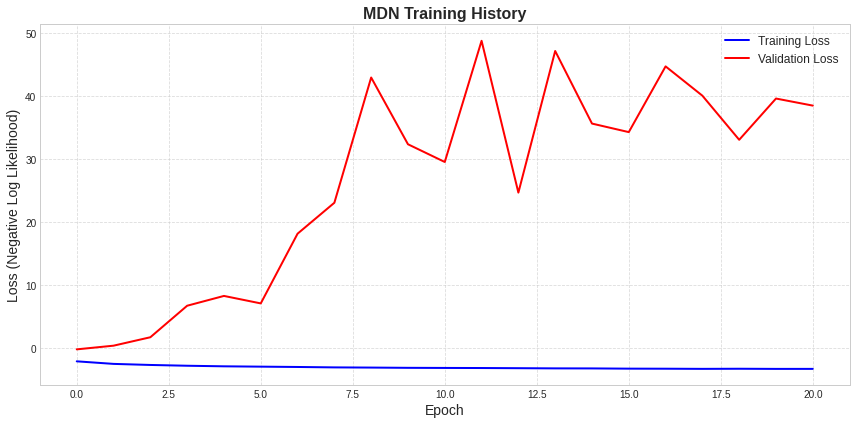

922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step

Metrics on SCALED data:
MDN (Scaled) Metrics:
MSE: 1.9901
RMSE: 1.4107
MAE: 0.5275
R²: -0.9939

Metrics on ORIGINAL scale:
MDN (Original Scale) Metrics:
MSE: 2189570.8776
RMSE: 1479.7199
MAE: 553.3542
R²: -0.9939


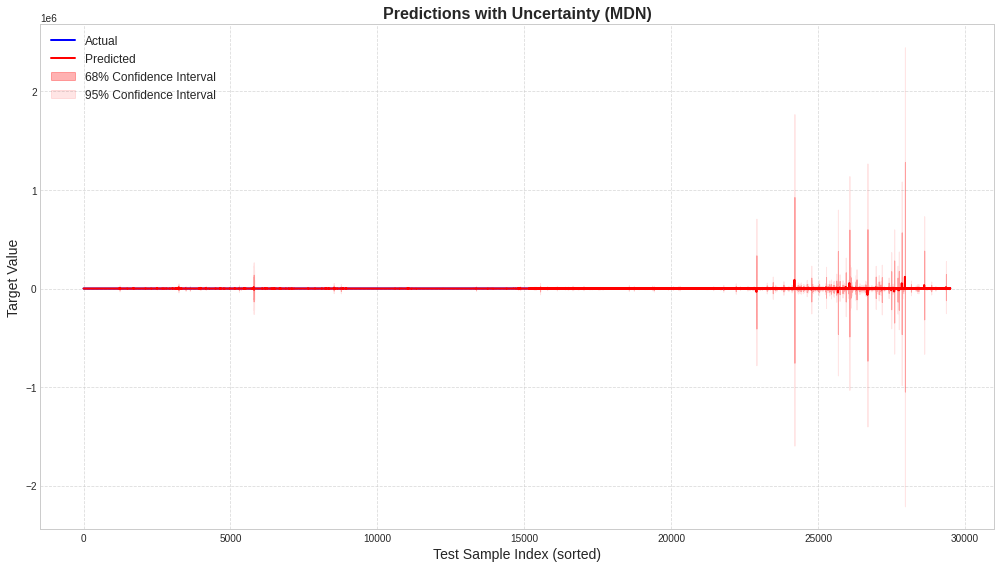

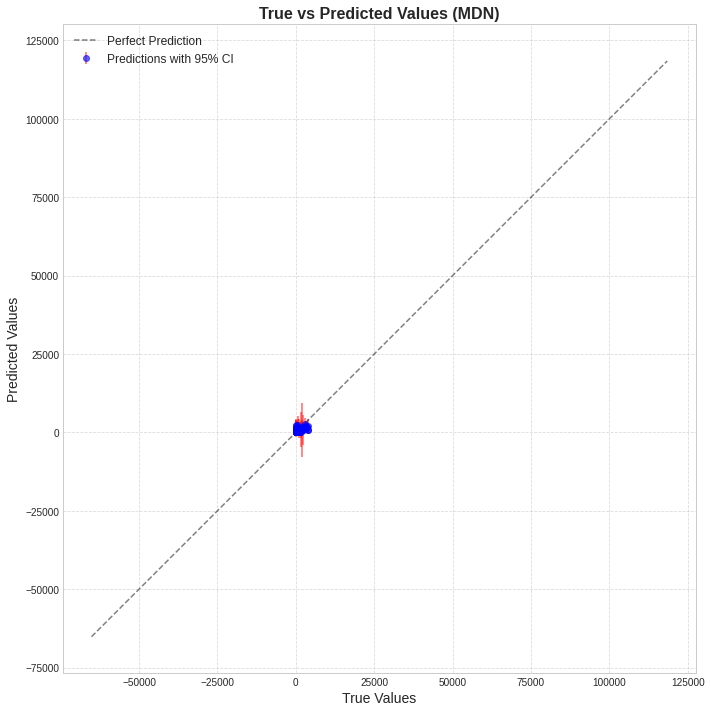

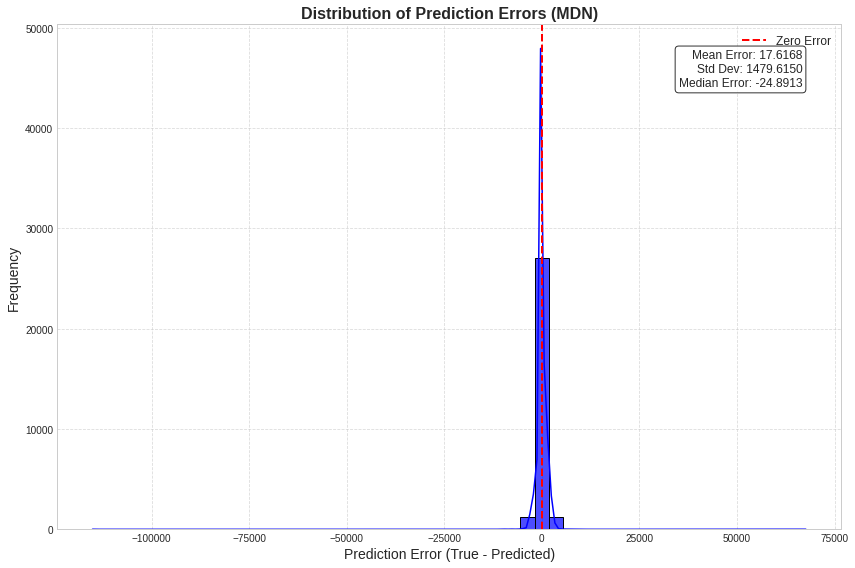


Probabilistic Metrics for MDN:
Coverage (95% interval): 0.8211 (ideal: 0.95)
Coverage (68% interval): 0.6041 (ideal: 0.68)
Sharpness (mean 95% interval width): 1775.4011
Sharpness (mean 68% interval width): 805.7890


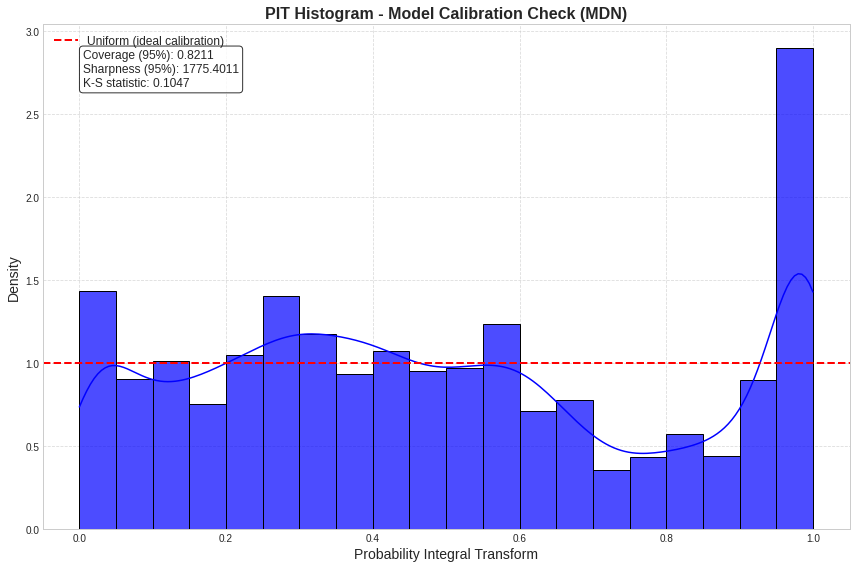

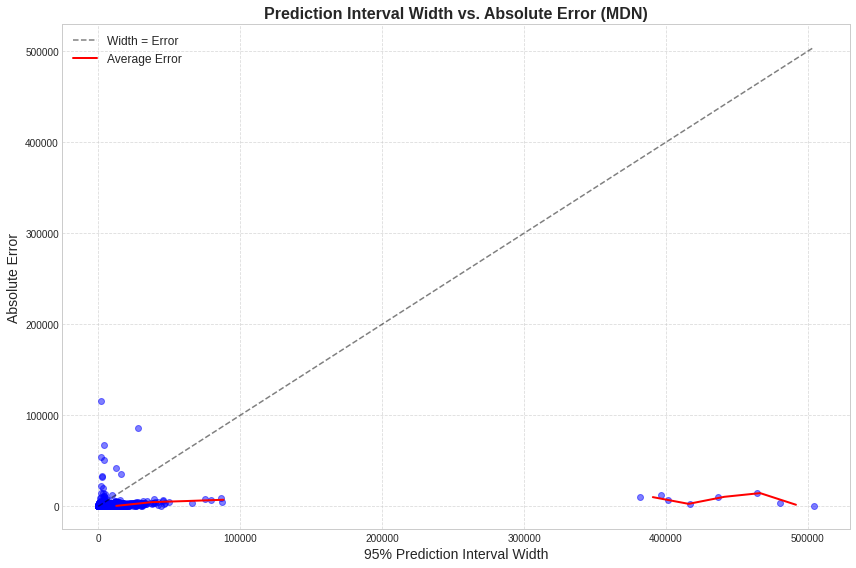

In [5]:
# Standalone Mixture Density Network implementation with improved visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
import time
import seaborn as sns

# Set better plot style
plt.style.use('seaborn-whitegrid')
sns.set_palette("deep")

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#=============================================================================
# MIXTURE DENSITY NETWORK MODEL
#=============================================================================

class MDN:
    def __init__(self, input_dim, num_mixtures=5):
        self.input_dim = input_dim
        self.num_mixtures = num_mixtures
        self.model = self.build_model()
        
    def build_model(self):
        """Build the MDN model architecture"""
        # Input layer
        inputs = keras.Input(shape=(self.input_dim,))
        
        # Hidden layers
        x = layers.Dense(128)(inputs)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Dense(128)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Dense(64)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.BatchNormalization()(x)
        
        # Output layers for mixture parameters
        pi_outputs = layers.Dense(self.num_mixtures, activation='softmax', name='pi')(x)  # Mixture weights
        mu_outputs = layers.Dense(self.num_mixtures, name='mu')(x)  # Means
        sigma_outputs = layers.Dense(self.num_mixtures, activation='exponential', name='sigma')(x)  # Standard deviations
        
        # Concatenate all outputs
        outputs = layers.Concatenate(name='mdn_outputs')([pi_outputs, mu_outputs, sigma_outputs])
        
        # Create model
        model = keras.Model(inputs=inputs, outputs=outputs)
        return model
    
    def compile_model(self, learning_rate=0.001):
        self.optimizer = keras.optimizers.Adam(learning_rate)
        self.model.compile(
            loss=self.mdn_loss,
            optimizer=self.optimizer
        )
    
    def mdn_loss(self, y_true, y_pred):
        # Unpack mixture parameters
        batch_size = tf.shape(y_pred)[0]
        
        # Split into pi, mu, sigma
        pi = y_pred[:, :self.num_mixtures]
        mu = y_pred[:, self.num_mixtures:2*self.num_mixtures]
        sigma = y_pred[:, 2*self.num_mixtures:]
        
        # Reshape target
        y_true = tf.reshape(y_true, [-1, 1])
        
        # Expand dimensions for broadcasting
        y_true_expanded = tf.expand_dims(y_true, axis=1)  # [batch_size, 1, 1]
        
        # Calculate negative log likelihood
        dist = tfp.distributions.Normal(loc=mu, scale=sigma)
        log_prob = dist.log_prob(y_true_expanded)
        
        # Weight by mixture probabilities
        weighted_log_prob = log_prob + tf.math.log(pi + 1e-10)
        
        # Log-sum-exp trick for numerical stability
        max_weighted_log_prob = tf.reduce_max(weighted_log_prob, axis=1, keepdims=True)
        weighted_log_prob = weighted_log_prob - max_weighted_log_prob
        
        # Log likelihood
        log_likelihood = max_weighted_log_prob + tf.math.log(tf.reduce_sum(tf.exp(weighted_log_prob), axis=1, keepdims=True) + 1e-10)
        
        # Return negative log likelihood
        return -tf.reduce_mean(log_likelihood)
    
    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=200, batch_size=64, patience=20, verbose=1):
        callbacks = []
        
        # Add early stopping if validation data is provided
        if X_val is not None and y_val is not None:
            early_stopping = keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=patience,
                restore_best_weights=True,
                verbose=1
            )
            callbacks.append(early_stopping)
        
        # Train the model
        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val) if X_val is not None and y_val is not None else None,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=verbose
        )
        
        # Plot improved training history
        self._plot_training_history(history)
        
        return history
    
    def _plot_training_history(self, history):
        plt.figure(figsize=(12, 6))
        
        # Main plot
        plt.plot(history.history['loss'], 'b-', linewidth=2, label='Training Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], 'r-', linewidth=2, label='Validation Loss')
        
        # Add grid
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Add titles and labels
        plt.title('MDN Training History', fontsize=16, fontweight='bold')
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel('Loss (Negative Log Likelihood)', fontsize=14)
        
        # Add legend
        plt.legend(fontsize=12)
        
        # Improve appearance
        plt.tight_layout()
        plt.show()
    
    def predict(self, X_test, num_samples=100):
        # Get model output
        y_pred = self.model.predict(X_test)
        batch_size = y_pred.shape[0]
        
        # Split into pi, mu, sigma
        pi = y_pred[:, :self.num_mixtures]
        mu = y_pred[:, self.num_mixtures:2*self.num_mixtures]
        sigma = y_pred[:, 2*self.num_mixtures:]
        
        # Generate samples
        samples = np.zeros((num_samples, batch_size))
        
        # For each test point, sample from the mixture
        for i in range(batch_size):
            # Sample mixture components based on mixture weights
            mixture_indices = np.random.choice(self.num_mixtures, size=num_samples, p=pi[i])
            
            # Generate samples from the selected Gaussians
            for j in range(num_samples):
                idx = mixture_indices[j]
                samples[j, i] = np.random.normal(mu[i, idx], sigma[i, idx])
        
        # Calculate mean and std from samples
        mean_pred = np.mean(samples, axis=0)
        std_pred = np.std(samples, axis=0)
        
        return mean_pred, std_pred, samples

#=============================================================================
# IMPROVED EVALUATION FUNCTIONS 
#=============================================================================

def evaluate_model(y_true, y_pred, model_name):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

def plot_results(y_true, y_pred_mean, y_pred_std, title, model_name):
    # Convert to numpy arrays
    y_true_np = y_true.values if hasattr(y_true, 'values') else np.array(y_true)
    y_pred_mean_np = np.array(y_pred_mean)
    y_pred_std_np = np.array(y_pred_std)
    
    # Sort for better visualization
    sort_idx = np.argsort(y_true_np)
    y_test_sorted = y_true_np[sort_idx]
    y_pred_sorted = y_pred_mean_np[sort_idx]
    y_std_sorted = y_pred_std_np[sort_idx]
    
    # Create a nice figure
    plt.figure(figsize=(14, 8))
    
    # Plot true values and predictions
    plt.plot(range(len(y_test_sorted)), y_test_sorted, 'b-', linewidth=2, label='Actual')
    plt.plot(range(len(y_pred_sorted)), y_pred_sorted, 'r-', linewidth=2, label='Predicted')
    
    # Plot uncertainty bands with alpha gradient
    plt.fill_between(
        range(len(y_pred_sorted)),
        y_pred_sorted - 1 * y_std_sorted,
        y_pred_sorted + 1 * y_std_sorted,
        color='red', alpha=0.3,
        label='68% Confidence Interval'
    )
    
    plt.fill_between(
        range(len(y_pred_sorted)),
        y_pred_sorted - 2 * y_std_sorted,
        y_pred_sorted + 2 * y_std_sorted,
        color='red', alpha=0.1,
        label='95% Confidence Interval'
    )
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add titles and labels
    plt.title(f'{title} ({model_name})', fontsize=16, fontweight='bold')
    plt.xlabel('Test Sample Index (sorted)', fontsize=14)
    plt.ylabel('Target Value', fontsize=14)
    
    # Add legend
    plt.legend(fontsize=12, loc='upper left')
    
    # Improve appearance
    plt.tight_layout()
    plt.show()
    
    # Create a second visualization - True vs Predicted scatter plot
    plt.figure(figsize=(10, 10))
    
    # Calculate confidence intervals
    lower_ci = y_pred_mean_np - 2 * y_pred_std_np
    upper_ci = y_pred_mean_np + 2 * y_pred_std_np
    
    # Plot diagonal line (perfect predictions)
    min_val = min(y_true_np.min(), y_pred_mean_np.min())
    max_val = max(y_true_np.max(), y_pred_mean_np.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Prediction')
    
    # Plot predictions with error bars for a subset of points (for clarity)
    subset_size = min(100, len(y_true_np))
    subset_indices = np.random.choice(len(y_true_np), subset_size, replace=False)
    
    plt.errorbar(
        y_true_np[subset_indices], 
        y_pred_mean_np[subset_indices],
        yerr=2 * y_pred_std_np[subset_indices],
        fmt='o', 
        ecolor='red',
        color='blue',
        alpha=0.6, 
        label='Predictions with 95% CI'
    )
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add titles and labels
    plt.title(f'True vs Predicted Values ({model_name})', fontsize=16, fontweight='bold')
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    
    # Add legend
    plt.legend(fontsize=12)
    
    # Make axes equal
    plt.axis('equal')
    
    # Improve appearance
    plt.tight_layout()
    plt.show()
    
    # Plot histogram of errors with improved styling
    plt.figure(figsize=(12, 8))
    
    # Calculate errors
    errors = y_true_np - y_pred_mean_np
    
    # Create histogram with KDE
    sns.histplot(errors, bins=50, kde=True, color='blue', alpha=0.7)
    
    # Add vertical line at zero
    plt.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add titles and labels
    plt.title(f'Distribution of Prediction Errors ({model_name})', fontsize=16, fontweight='bold')
    plt.xlabel('Prediction Error (True - Predicted)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Add error statistics as text
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    median_error = np.median(errors)
    
    stats_text = f"Mean Error: {mean_error:.4f}\nStd Dev: {std_error:.4f}\nMedian Error: {median_error:.4f}"
    plt.text(
        0.95, 0.95, stats_text,
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    
    # Add legend
    plt.legend(fontsize=12)
    
    # Improve appearance
    plt.tight_layout()
    plt.show()

def calculate_probabilistic_metrics(y_true, y_pred_samples, model_name):
    """Calculate and plot probabilistic metrics with improved visualization"""
    # Calculate coverage (percentage of true values within 95% prediction interval)
    lower_95 = np.percentile(y_pred_samples, 2.5, axis=0)
    upper_95 = np.percentile(y_pred_samples, 97.5, axis=0)
    coverage_95 = np.mean((y_true >= lower_95) & (y_true <= upper_95))
    
    # Calculate coverage for 68% interval (1 sigma)
    lower_68 = np.percentile(y_pred_samples, 16, axis=0)
    upper_68 = np.percentile(y_pred_samples, 84, axis=0)
    coverage_68 = np.mean((y_true >= lower_68) & (y_true <= upper_68))
    
    # Calculate sharpness (mean width of prediction intervals)
    sharpness_95 = np.mean(upper_95 - lower_95)
    sharpness_68 = np.mean(upper_68 - lower_68)
    
    # Calculate PIT (Probability Integral Transform) values
    pit_values = []
    for i in range(len(y_true)):
        # Calculate empirical CDF at the true value
        pit = np.mean(y_pred_samples[:, i] <= y_true[i])
        pit_values.append(pit)
    
    # Print metrics
    print(f"\nProbabilistic Metrics for {model_name}:")
    print(f"Coverage (95% interval): {coverage_95:.4f} (ideal: 0.95)")
    print(f"Coverage (68% interval): {coverage_68:.4f} (ideal: 0.68)")
    print(f"Sharpness (mean 95% interval width): {sharpness_95:.4f}")
    print(f"Sharpness (mean 68% interval width): {sharpness_68:.4f}")
    
    # Plot improved PIT histogram
    plt.figure(figsize=(12, 8))
    
    # Create histogram with KDE
    sns.histplot(pit_values, bins=20, kde=True, stat='density', color='blue', alpha=0.7)
    
    # Add uniform distribution line
    plt.axhline(y=1.0, color='r', linestyle='--', linewidth=2, label='Uniform (ideal calibration)')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add titles and labels
    plt.title(f'PIT Histogram - Model Calibration Check ({model_name})', fontsize=16, fontweight='bold')
    plt.xlabel('Probability Integral Transform', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    
    # Add calibration statistics
    ks_stat = np.max(np.abs(np.sort(pit_values) - np.linspace(0, 1, len(pit_values))))
    
    stats_text = f"Coverage (95%): {coverage_95:.4f}\nSharpness (95%): {sharpness_95:.4f}\nK-S statistic: {ks_stat:.4f}"
    plt.text(
        0.05, 0.95, stats_text,
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    
    # Add legend
    plt.legend(fontsize=12)
    
    # Improve appearance
    plt.tight_layout()
    plt.show()
    
    # Additional visualization: Width of prediction intervals vs. prediction error
    plt.figure(figsize=(12, 8))
    
    # Calculate prediction means from samples
    pred_means = np.mean(y_pred_samples, axis=0)
    
    # Calculate absolute errors
    abs_errors = np.abs(y_true - pred_means)
    
    # Calculate interval widths
    interval_widths = upper_95 - lower_95
    
    # Create scatter plot
    plt.scatter(interval_widths, abs_errors, alpha=0.5, color='blue')
    
    # Add diagonal line (width = error)
    max_val = max(interval_widths.max(), abs_errors.max())
    plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Width = Error')
    
    # Add smoothed trend line
    from scipy.stats import binned_statistic
    bin_means, bin_edges, _ = binned_statistic(
        interval_widths, abs_errors, statistic='mean', bins=20)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, bin_means, 'r-', linewidth=2, label='Average Error')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add titles and labels
    plt.title(f'Prediction Interval Width vs. Absolute Error ({model_name})', fontsize=16, fontweight='bold')
    plt.xlabel('95% Prediction Interval Width', fontsize=14)
    plt.ylabel('Absolute Error', fontsize=14)
    
    # Add legend
    plt.legend(fontsize=12)
    
    # Improve appearance
    plt.tight_layout()
    plt.show()
    
    return {
        'coverage_95': coverage_95,
        'coverage_68': coverage_68,
        'sharpness_95': sharpness_95,
        'sharpness_68': sharpness_68,
        'pit_values': pit_values,
        'ks_stat': ks_stat
    }

#=============================================================================
# FUNCTION TO RUN MDN
#=============================================================================

def run_mdn(data_dict, results):
    X_train_scaled = data_dict['X_train_scaled']
    y_train_scaled = data_dict['y_train_scaled']
    X_val_scaled = data_dict['X_val_scaled']
    y_val_scaled = data_dict['y_val_scaled']
    X_test_scaled = data_dict['X_test_scaled']
    y_test_scaled = data_dict['y_test_scaled']
    y_scaler = data_dict['y_scaler']
    y_test = data_dict['y_test']
    
    #-------------------------------------------------------------------------
    # Run Mixture Density Network
    #-------------------------------------------------------------------------
    print("\n" + "="*70)
    print("RUNNING MIXTURE DENSITY NETWORK")
    print("="*70)
    
    # Initialize and compile MDN
    mdn = MDN(input_dim=X_train_scaled.shape[1], num_mixtures=5)
    mdn.compile_model(learning_rate=0.001)
    
    try:
        # Train MDN
        mdn.fit(
            X_train_scaled, y_train_scaled,
            X_val=X_val_scaled, y_val=y_val_scaled,
            epochs=150, batch_size=64, patience=20,
            verbose=1
        )
        
        # Generate predictions
        y_pred_mean, y_pred_std, y_pred_samples = mdn.predict(X_test_scaled, num_samples=100)
        
        # Store scaled predictions
        y_pred_mean_scaled = y_pred_mean.copy()
        y_pred_std_scaled = y_pred_std.copy()
        y_pred_samples_scaled = y_pred_samples.copy()
        
        # Inverse transform predictions
        y_pred_mean = y_scaler.inverse_transform(y_pred_mean.reshape(-1, 1)).flatten()
        
        # Handle scalar or array for scale_
        if hasattr(y_scaler, 'scale_') and hasattr(y_scaler.scale_, '__getitem__'):
            y_pred_std = y_pred_std * y_scaler.scale_[0]
        else:
            y_pred_std = y_pred_std * y_scaler.scale_
        
        # Inverse transform all prediction samples
        y_pred_samples_original = np.empty_like(y_pred_samples)
        for i in range(y_pred_samples.shape[0]):
            y_pred_samples_original[i] = y_scaler.inverse_transform(y_pred_samples[i].reshape(-1, 1)).flatten()
        
        # Evaluate model
        print("\nMetrics on SCALED data:")
        metrics_scaled = evaluate_model(y_test_scaled, y_pred_mean_scaled, "MDN (Scaled)")
        
        print("\nMetrics on ORIGINAL scale:")
        metrics_orig = evaluate_model(
            y_test.values if hasattr(y_test, 'values') else y_test, 
            y_pred_mean, 
            "MDN (Original Scale)"
        )
        
        # Plot results with improved visualization
        plot_results(
            y_test, y_pred_mean, y_pred_std,
            'Predictions with Uncertainty', 'MDN'
        )
        
        # Calculate probabilistic metrics with improved visualization
        prob_metrics = calculate_probabilistic_metrics(
            y_test.values if hasattr(y_test, 'values') else y_test,
            y_pred_samples_original, 'MDN'
        )
        
        # Store results
        results['mdn'] = {
            'model': mdn,
            'y_pred_mean': y_pred_mean,
            'y_pred_std': y_pred_std,
            'y_pred_samples': y_pred_samples_original,
            'metrics_scaled': metrics_scaled,
            'metrics_orig': metrics_orig,
            'y_true': y_test.values if hasattr(y_test, 'values') else y_test,
            'prob_metrics': prob_metrics
        }
    
    except Exception as e:
        print(f"Error training Mixture Density Network: {str(e)}")
        print("Skipping Mixture Density Network model...")
    
    return results

# Example usage:
# After running Quantile Regression and Bayesian Regression:
results = run_mdn(data_dict, results)



## gausian process


Running Gaussian Process Regression
Subsampling training data for GP from 137273 to 1000 samples
Learned kernel parameters:
Matern(length_scale=5.12, nu=1.5) + WhiteKernel(noise_level=1e-05)
Training time: 35.38 seconds

Metrics on SCALED data:
GP (Scaled) Metrics:
MSE: 0.0915
RMSE: 0.3025
MAE: 0.1451
R²: 0.9083

Metrics on ORIGINAL scale:
GP (Original Scale) Metrics:
MSE: 100856.6965
RMSE: 317.5794
MAE: 152.3128
R²: 0.9083


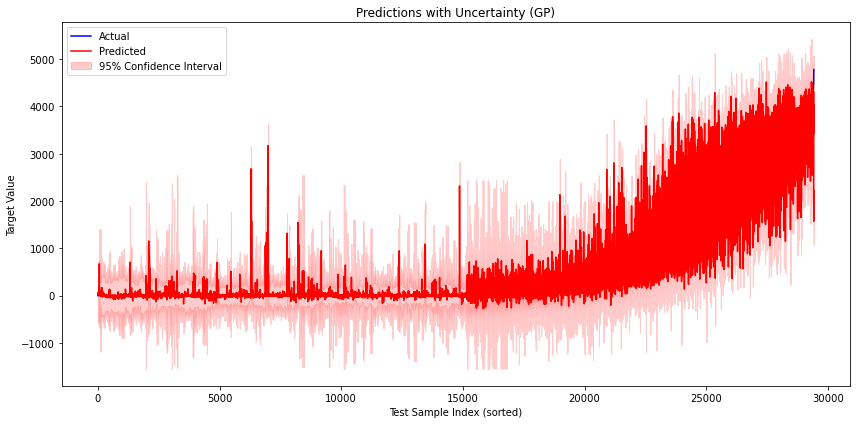

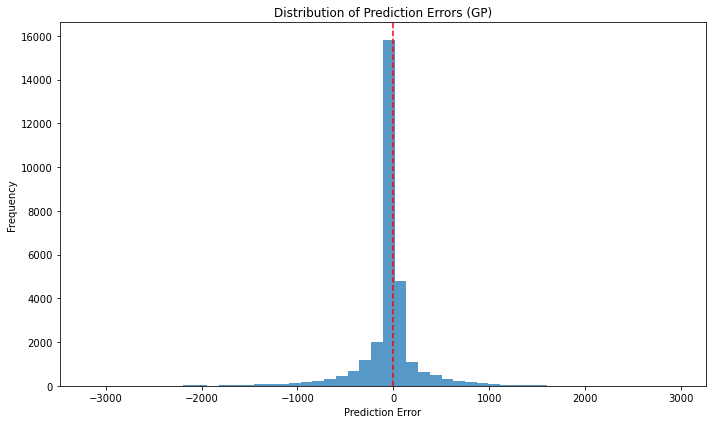


Probabilistic Metrics for GP:
Coverage (95% interval): 0.9111 (ideal: 0.95)
Sharpness (mean 95% interval width): 850.0984


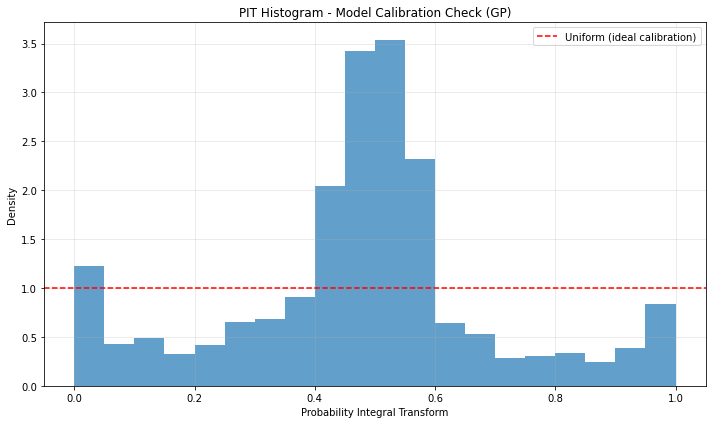

In [46]:
# Standalone Gaussian Process Regression implementation with evaluation metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
import time

# Set seed for reproducibility
np.random.seed(42)

#=============================================================================
# GAUSSIAN PROCESS REGRESSION MODEL
#=============================================================================

class GPRegression:
    def __init__(self, kernel=None):
        if kernel is None:
            # Default kernel: Matern + White noise
            self.kernel = Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1.0)
        else:
            self.kernel = kernel
            
        # Create the GP model
        self.model = GaussianProcessRegressor(
            kernel=self.kernel,
            alpha=1e-10,  # Numerical stability
            normalize_y=True,
            n_restarts_optimizer=5,
            random_state=42
        )
    
    def fit(self, X_train, y_train, verbose=1):
        """Train the GP model"""
        start_time = time.time()
        
        # Warning for large datasets
        if X_train.shape[0] > 2000 and verbose:
            print("Warning: GP regression may be slow with large datasets.")
            print("Consider using a subset of the data for faster training.")
        
        # Fit the model
        self.model.fit(X_train, y_train)
        
        # Print kernel parameters if verbose
        if verbose:
            print("Learned kernel parameters:")
            print(self.model.kernel_)
            print(f"Training time: {time.time() - start_time:.2f} seconds")
            
        return self
    
    def predict(self, X_test, num_samples=100):
        """Generate predictions with uncertainty"""
        # Get mean and std directly from the GP
        mean_pred, std_pred = self.model.predict(X_test, return_std=True)
        
        # Generate samples for consistency with other models
        samples = np.zeros((num_samples, len(mean_pred)))
        
        # Sample from normal distributions defined by mean and std
        for i in range(len(mean_pred)):
            samples[:, i] = np.random.normal(mean_pred[i], std_pred[i], num_samples)
        
        return mean_pred, std_pred, samples

#=============================================================================
# EVALUATION FUNCTIONS 
#=============================================================================

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance and return metrics"""
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

def plot_results(y_true, y_pred_mean, y_pred_std, title, model_name):
    """Plot prediction results with uncertainty bands"""
    # Convert to numpy arrays
    y_true_np = y_true.values if hasattr(y_true, 'values') else np.array(y_true)
    y_pred_mean_np = np.array(y_pred_mean)
    y_pred_std_np = np.array(y_pred_std)
    
    # Sort for better visualization
    sort_idx = np.argsort(y_true_np)
    y_test_sorted = y_true_np[sort_idx]
    y_pred_sorted = y_pred_mean_np[sort_idx]
    y_std_sorted = y_pred_std_np[sort_idx]
    
    # Plot predictions with uncertainty
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_sorted, 'b-', label='Actual')
    plt.plot(y_pred_sorted, 'r-', label='Predicted')
    
    # Plot uncertainty bands (±2 std dev)
    plt.fill_between(
        range(len(y_pred_sorted)),
        y_pred_sorted - 2 * y_std_sorted,
        y_pred_sorted + 2 * y_std_sorted,
        color='r',
        alpha=0.2,
        label='95% Confidence Interval'
    )
    
    plt.xlabel('Test Sample Index (sorted)')
    plt.ylabel('Target Value')
    plt.title(f'{title} ({model_name})')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot histogram of errors
    plt.figure(figsize=(10, 6))
    errors = y_true_np - y_pred_mean_np
    plt.hist(errors, bins=50, alpha=0.75)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Prediction Errors ({model_name})')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

def calculate_probabilistic_metrics(y_true, y_pred_samples, model_name):
    """Calculate and plot probabilistic metrics"""
    # Calculate coverage (percentage of true values within 95% prediction interval)
    lower_95 = np.percentile(y_pred_samples, 2.5, axis=0)
    upper_95 = np.percentile(y_pred_samples, 97.5, axis=0)
    coverage_95 = np.mean((y_true >= lower_95) & (y_true <= upper_95))
    
    # Calculate sharpness (mean width of prediction intervals)
    sharpness_95 = np.mean(upper_95 - lower_95)
    
    # Calculate PIT (Probability Integral Transform) values
    pit_values = []
    for i in range(len(y_true)):
        # Calculate empirical CDF at the true value
        pit = np.mean(y_pred_samples[:, i] <= y_true[i])
        pit_values.append(pit)
    
    # Print metrics
    print(f"\nProbabilistic Metrics for {model_name}:")
    print(f"Coverage (95% interval): {coverage_95:.4f} (ideal: 0.95)")
    print(f"Sharpness (mean 95% interval width): {sharpness_95:.4f}")
    
    # Plot PIT histogram
    plt.figure(figsize=(10, 6))
    plt.hist(pit_values, bins=20, density=True, alpha=0.7)
    plt.axhline(y=1.0, color='r', linestyle='--', label='Uniform (ideal calibration)')
    plt.xlabel('Probability Integral Transform')
    plt.ylabel('Density')
    plt.title(f'PIT Histogram - Model Calibration Check ({model_name})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return {
        'coverage_95': coverage_95,
        'sharpness_95': sharpness_95,
        'pit_values': pit_values
    }

#=============================================================================
# FUNCTION TO RUN GAUSSIAN PROCESS
#=============================================================================

def run_gaussian_process(data_dict, results, max_samples=1000):
    """
    Run Gaussian Process Regression using the data and scalers from previous runs
    
    Args:
        data_dict: Dictionary containing data and scalers from previous runs
        results: Dictionary containing results from previous models
        max_samples: Maximum number of samples to use for GP training (for large datasets)
        
    Returns:
        Updated results dictionary
    """
    X_train_scaled = data_dict['X_train_scaled']
    y_train_scaled = data_dict['y_train_scaled']
    X_test_scaled = data_dict['X_test_scaled']
    y_test_scaled = data_dict['y_test_scaled']
    y_scaler = data_dict['y_scaler']
    y_test = data_dict['y_test']
    
    #-------------------------------------------------------------------------
    # Run Gaussian Process Regression
    #-------------------------------------------------------------------------
    print("\n" + "="*50)
    print("Running Gaussian Process Regression")
    print("="*50)
    
    # For large datasets, we may need to subsample
    if X_train_scaled.shape[0] > max_samples:
        print(f"Subsampling training data for GP from {X_train_scaled.shape[0]} to {max_samples} samples")
        indices = np.random.choice(X_train_scaled.shape[0], max_samples, replace=False)
        X_train_gp = X_train_scaled[indices]
        y_train_gp = y_train_scaled[indices]
    else:
        X_train_gp = X_train_scaled
        y_train_gp = y_train_scaled
    
    # Initialize and train GP
    gp = GPRegression()
    
    try:
        gp.fit(X_train_gp, y_train_gp, verbose=1)
        
        # Generate predictions
        y_pred_mean, y_pred_std, y_pred_samples = gp.predict(X_test_scaled, num_samples=100)
        
        # Store scaled predictions
        y_pred_mean_scaled = y_pred_mean.copy()
        y_pred_std_scaled = y_pred_std.copy()
        y_pred_samples_scaled = y_pred_samples.copy()
        
        # Inverse transform predictions
        y_pred_mean = y_scaler.inverse_transform(y_pred_mean.reshape(-1, 1)).flatten()
        
        # Handle scalar or array for scale_
        if hasattr(y_scaler, 'scale_') and hasattr(y_scaler.scale_, '__getitem__'):
            y_pred_std = y_pred_std * y_scaler.scale_[0]
        else:
            y_pred_std = y_pred_std * y_scaler.scale_
        
        # Inverse transform all prediction samples
        y_pred_samples_original = np.empty_like(y_pred_samples)
        for i in range(y_pred_samples.shape[0]):
            y_pred_samples_original[i] = y_scaler.inverse_transform(y_pred_samples[i].reshape(-1, 1)).flatten()
        
        # Evaluate model
        print("\nMetrics on SCALED data:")
        metrics_scaled = evaluate_model(y_test_scaled, y_pred_mean_scaled, "GP (Scaled)")
        
        print("\nMetrics on ORIGINAL scale:")
        metrics_orig = evaluate_model(
            y_test.values if hasattr(y_test, 'values') else y_test, 
            y_pred_mean, 
            "GP (Original Scale)"
        )
        
        # Plot results
        plot_results(
            y_test, y_pred_mean, y_pred_std,
            'Predictions with Uncertainty', 'GP'
        )
        
        # Calculate probabilistic metrics
        prob_metrics = calculate_probabilistic_metrics(
            y_test.values if hasattr(y_test, 'values') else y_test,
            y_pred_samples_original, 'GP'
        )
        
        # Store results
        results['gp'] = {
            'model': gp,
            'y_pred_mean': y_pred_mean,
            'y_pred_std': y_pred_std,
            'y_pred_samples': y_pred_samples_original,
            'metrics_scaled': metrics_scaled,
            'metrics_orig': metrics_orig,
            'y_true': y_test.values if hasattr(y_test, 'values') else y_test,
            'prob_metrics': prob_metrics
        }
    
    except Exception as e:
        print(f"Error training Gaussian Process: {str(e)}")
        print("Skipping Gaussian Process model...")
    
    return results

# Example usage:
# After running Quantile Regression and Bayesian Regression:
results = run_gaussian_process(data_dict, results, max_samples=1000)


